## Y&Z세대 투자자 프로파일링

### 데이터 load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
act_info = pd.read_csv('C:/Users/user/Desktop/project/data/2_act_info.csv')
cus_info = pd.read_csv('C:/Users/user/Desktop/project/data/2_cus_info.csv')
iem_info = pd.read_csv('C:/Users/user/Desktop/project/data/2_iem_info.csv')
trd_kr = pd.read_csv('C:/Users/user/Desktop/project/data/2_trd_kr.csv')
trd_oss = pd.read_csv('C:/Users/user/Desktop/project/data/2_trd_oss.csv')

### 1. 연령대별 국내 투자대비 해외 투자 비율

In [7]:
trd_oss.head()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00


In [8]:
trd_oss.groupby('cur_cd').nunique()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
cur_cd,,,,,,,,,,,,
AUD,3,4,2,2,2,5,2,4,5,1,1,4
CAD,10,14,12,4,6,3,2,22,16,1,1,14
CNY,67,187,71,6,6,95,2,153,649,3,1,166
EUR,17,34,4,11,10,14,2,9,50,2,1,33
GBP,4,20,7,8,8,6,2,28,37,1,1,20
HKD,42,109,22,8,8,37,2,43,166,3,1,106
IDR,5,22,15,7,7,8,2,31,31,2,1,18
JPY,16,47,5,7,6,16,2,28,76,3,1,47
SGD,1,1,30,1,1,1,1,2,1,1,1,1


### 1-1. 연령대별 해외 투자

In [9]:
# 고객 정보와 해외 거래 정보 연결
a1 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a1 = pd.merge(a1, trd_oss, on = 'act_id', how = 'left')
a1

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,200604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,199511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,199408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52431,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,530858638ae97f3eae6ba84318790ec8abbced1c3b9bc4...,200209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52432,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,6e76f7efd3e36a7b1d679417a14c413455a88bafdebc3c...,201807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52433,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,21f135109922a4393eaa622c5e40be9f75ef5073e7606a...,201310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52434,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#고객 나이별 각 국가에 대한 거래 내역 횟수
b1 = pd.DataFrame(a1.groupby(['cus_age','cur_cd'])['cus_id'].nunique().reset_index())
b1

,cus_age,cur_cd,cus_id
0,0,CAD,1
1,0,CNY,1
2,0,HKD,1
3,0,USD,30
4,20,EUR,2
...,...,...,...
70,65,USD,10
71,70,CAD,1
72,70,CNY,5
73,70,HKD,1


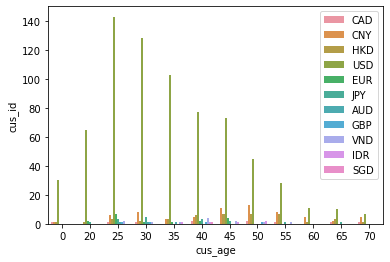

In [11]:
ax = sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b1 )
ax.legend(loc='upper right')

모든 연령대에서 USD(미국달러)에 대한 투자량이 가장 많다. 특히 Y,Z세대의 경우 다른 세대에 비해 월등하게 차이가 난다. 또한 20세~25세 미만을 제외한 Y,Z세대의 해외 투자량이 다른 세대에 비해 월등하게 많다. 

USD값이 너무 커서 다른 국가에 대한 분포가 보이지 않기 때문에 자세히 보기 위해 USD를 제외하고 다시 그려보았다.

In [12]:
# USD 제외한 고객 나이별 각 국가에 대한 거래 내역 횟수
b_1 = b1[b1['cur_cd'] != 'USD']

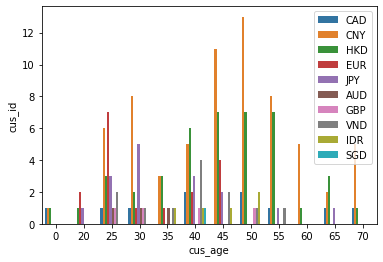

In [13]:
ax=sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b_1 )
ax.legend(loc='upper right')

25~45세가 다른 연령대에 비해 해외투자를 골고루 하고 있다는 것을 알 수 있다. USD를 제외하면 특히 Y세대는 CNY(중국위안화)에 대해, Z세대는 EUR(유로)와 CNY에 대해, 그리고 그 이상의 세대는 CNY와 HKD(홍콩달러)에 대해 투자를 많이 하는 것으로 보인다.

In [14]:
#참고용으로 20, 30대의 그림만 다시 그려봄
b_1 = b1[((b1['cus_age']==20)|(b1['cus_age']==25)|(b1['cus_age']==30)|(b1['cus_age']==35))]

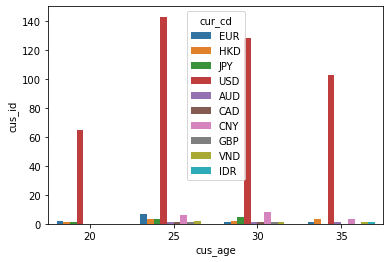

In [15]:
sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b_1 )

관심있는 Y,Z세대의 해외 투자 그래프를 다시 그려본 결과 위에서 언급한 것과 같이 USD가 압도적이며, 다른 국가에 대한 그래프는 이 그래프보단 그 위 그래프를 보는 것이 나을 것이다.

### 1-2. 연령대별 국내 투자

In [36]:
# 고객 정보와 국내 거래 정보 연결
a2 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a2 = pd.merge(a2, trd_kr, on = 'act_id', how = 'left')
a2

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,20190128.0,1.0,11.0,11.0,A007390,2.0,910.0,15000.0,1.0
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,200604,20200120.0,1.0,14.0,14.0,A079440,2.0,10.0,27300.0,4.0
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,199511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,199408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325621,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,20190702.0,1.0,10.0,10.0,A011200,2.0,750.0,3910.0,3.0
3325622,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,20190117.0,1.0,12.0,12.0,A054220,2.0,2531.0,918.0,3.0
3325623,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,20190109.0,1.0,15.0,15.0,A085310,1.0,1300.0,1790.0,3.0
3325624,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,20200326.0,1.0,9.0,9.0,A093370,2.0,500.0,5900.0,3.0


In [19]:
#고객 나이별 국내 거래 내역 횟수
b2 = pd.DataFrame(a2.groupby('cus_age')['cus_id'].nunique().reset_index())
b2

,cus_age,cus_id
0,0,212
1,20,348
2,25,906
3,30,957
4,35,1207
5,40,1302
6,45,1496
7,50,1272
8,55,987
9,60,647


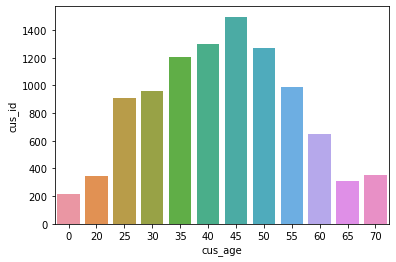

In [20]:
sns.barplot(x='cus_age',y='cus_id',data=b2 )

연령대별로 국내 투자에 대해 그래프를 그려보았을 때, 40대의 국내 투자량이 다른 연령대에 비해 가장 많고, 관심 연령대인 Y,Z세대는 그보단 투자량이 적은 편이다. 해외투자의 경우와 마찬가지로 20대 중반 이후 투자에 대한 관심이 확연하게 증가한다는 것을 알 수 있다.

### 1-3. 연령대별 국내 투자대비 해외 투자 비율

In [21]:
#고객 나이별 국내 거래 대비 해외 거래 내역
b3 = pd.merge(b1, b2, on = 'cus_age', how = 'left')
b3['ratio'] = b3['cus_id_x']/b3['cus_id_y']
b3 

,cus_age,cur_cd,cus_id_x,cus_id_y,ratio
0,0,CAD,1,212,0.004717
1,0,CNY,1,212,0.004717
2,0,HKD,1,212,0.004717
3,0,USD,30,212,0.141509
4,20,EUR,2,348,0.005747
...,...,...,...,...,...
70,65,USD,10,312,0.032051
71,70,CAD,1,354,0.002825
72,70,CNY,5,354,0.014124
73,70,HKD,1,354,0.002825


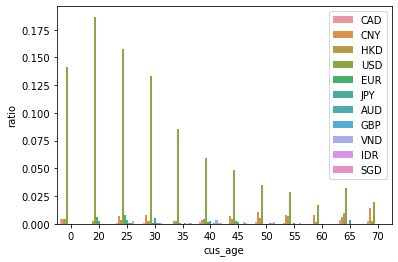

In [22]:
ax=sns.barplot(x='cus_age',y='ratio',hue='cur_cd',data=b3 )
ax.legend(loc='upper right')

해외 국가들중 그나마 투자량이 많은 미국의 경우에도 국내 투자량에 비하면 많아야 17.5%를 약간 넘기고, 그 외 국가는 2.5% 미만이다. 그래도 Y,Z세대의 국내 투자 대비 해외 투자 비율이 다른 연령대에 비해 높은 편이다. 

 ### 2-1. 투자성향별 투자국가 

In [37]:
# 고객 정보와 해외 거래 정보 연결
a1 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a1 = pd.merge(a1, trd_oss, on = 'act_id', how = 'left')
a1

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,200604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,199511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,199408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52431,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,530858638ae97f3eae6ba84318790ec8abbced1c3b9bc4...,200209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52432,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,6e76f7efd3e36a7b1d679417a14c413455a88bafdebc3c...,201807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52433,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,21f135109922a4393eaa622c5e40be9f75ef5073e7606a...,201310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52434,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,201410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'all')

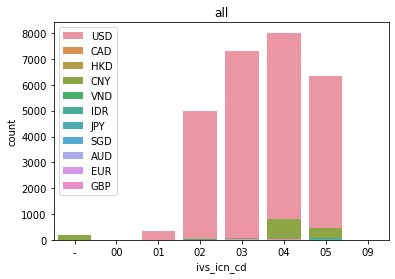

In [93]:
#전체
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("all")

1-3 안정, 중립 / 4-5 위험 / 9 전문

투자 성향별 투자 국가 그래프를 그려보니 투자성향이 공격적일수록 해외 투자량이 증가할 것이라 예상했는데, 의외로 가장 공격투자형인 5에서 투자량이 4보다 줄어들었다. 안정형을 제외하고 봤을때, 투자 성향과 상관없이 USD 투자량은 비슷하게 많아보이고, 더 위험 추구 성향이 되면 그 외 국가(CNY)에 대해 투자를 늘리는 것으로 보인다. 



Y,Z세대도 전체 연령대와 비슷한 성향을 보이는지 확인하기 위해 추가적으로 그래프를 그려보았다.

In [55]:
# Y세대와 Z세대 정보만 추출
a1_30 = a1[(a1['cus_age']==30) | (a1['cus_age']==35)]
a1_30.reset_index(drop = True, inplace = True)

a1_20 = a1[(a1['cus_age']==20) | (a1['cus_age']==25)]
a1_20.reset_index(drop = True, inplace = True)
display(a1_20)


,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,cb969784c289905b2e11a5c09235e7bd0a5b053e43f01d...,200411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,261ea6d393d9018f67404b98c27908dd83c4fde1ed2e97...,201503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,148f606b133795e28797dfd78bf5d0f7486534acda7565...,200604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,3b8c249d312c555dd2f3966da0e63225ce960a4769c597...,201503,20200318.0,1.0,0.0,2.0,US0079031078,2.0,5.0,39.0,3.0,USD,1241.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,8e6331f920af950e2db28b347f29b40298caab08a0765c...,1,25,42,05,00,3541ce6eefb826669fa0102e4baecac5dfeb14dc67cada...,201907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9331,6c464a7bc1bb16dbf375c3a64d8477821d75e75541453b...,2,25,41,04,02,082192a933e55a7c15d4f1f44ec278e0382935042f03b6...,201011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9332,8258367b7f30e20b20bc440d57ba627f7e623094f872f6...,2,25,45,04,04,48e3b0765744154a3ba458bd89ced2804df7988f1ac65e...,201409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9333,7051eb7aa1378c4208a2298c10fb4c36d879f20dd912a0...,1,20,27,09,-,1d29822bf9c0ca675cf4c8e2c55855de9453b08e8487fc...,202001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '30')

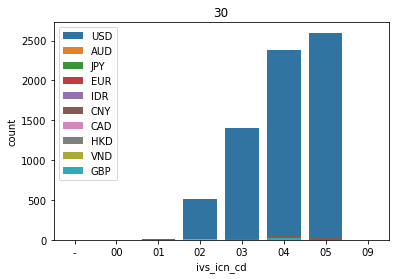

In [92]:
# Y세대(30대)
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1_30, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("30")

Text(0.5, 1.0, '20')

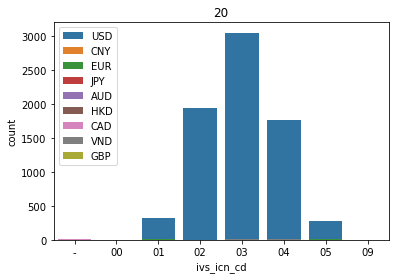

In [91]:
# Z세대(20대)
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1_20, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("20")

1-3 안정, 중립 / 4-5 위험 / 9 전문

Y세대(30대)의 경우는 예상과 일치하는 형태로, 더 공격적인 성향일수록 해외 투자량이 증가하는 모습을 보였고, Z세대(20대)의 경우는 중립형이 가장 해외투자를 많이 했으며 3을 대칭으로 감소하는 형태를 보이는게 특이했다. 

Y,Z세대도 전체 연령대 그래프와 유사하게 USD 투자가 압도적으로 많았고, 다른 국가는 보이지 않는다.

### 2-2. 고객등급별 투자국가

Text(0.5, 1.0, 'all')

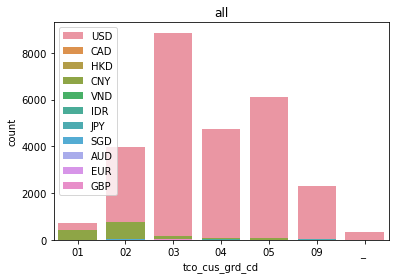

In [94]:
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("all")

1 탑클래스 / 2 골드 / 3 로얄 / 4 그린 / 5 블루 / 9 등급 없음 => 작을수록 높은 등급

고객 등급별 해외 투자 그래프를 그려보았는데, 고객 등급과 해외 투자량 사이에는 큰 관계가 없어보였고, 고객 등급이 높으면 여러 국가에 투자를 하는 것으로 보인다.


Y,Z세대도 전체 연령대와 비슷한 성향을 보이는지 확인하기 위해 추가적으로 그래프를 그려보았다.

Text(0.5, 1.0, '30')

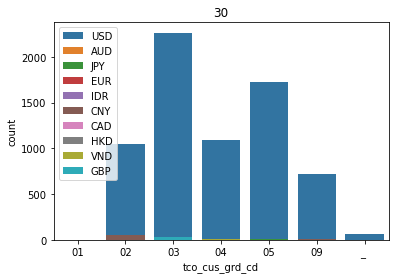

In [97]:
# Y세대(30대)
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1_30, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("30")

Text(0.5, 1.0, '20')

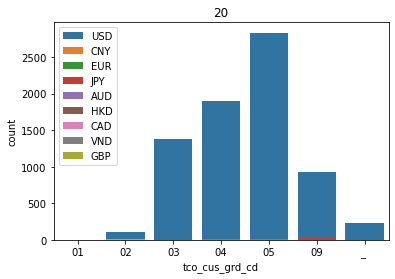

In [96]:
# Z세대(20대)
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1_20, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("20")

1 탑클래스 / 2 골드 / 3 로얄 / 4 그린 / 5 블루 / 9 등급 없음 => 작을수록 높은 등급

Y세대(30대)의 경우는 전체 연령대와 비슷한 형태의 그래프이고, 그나마 높은 등급인 2(골드), 3(로얄)에서 여러 국가에 투자한다고 할 수 있다. Z세대(20대)의 경우는 전체 연령대 그래프와 많이 다른 형태로 고객등급이 낮은편인 5(블루)에서의 투자량이 가장 많다. 20대이다보니 높은 등급 투자자 수 자체가 별로 없어서 형태 자체가 다른 것으로 예상된다. 또한 USD 외의 해외 투자가 거의 보이지 않는다.


# 이 위까지 입니다!! 수고하셨습니다

### 3. 연령대별 장,단기 투자 성향

In [23]:
cus_act_trd = a2

In [24]:
a2.head()

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,20190128.0,1.0,11.0,11.0,A007390,2.0,910.0,15000.0,1.0
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,200604,20200120.0,1.0,14.0,14.0,A079440,2.0,10.0,27300.0,4.0
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,199511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,199408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 주식 보유 기간 계산을 위해 c생성
c = a2.loc[:,['cus_id','cus_age','sby_dit_cd','orr_dt','cns_qty']].sort_values(by = ['cus_id','orr_dt'])
c.reset_index(drop = True, inplace = True)



In [26]:
# 변수명 변경
a2['sell_buy'] = a2['sby_dit_cd']

In [27]:
# 매도, 매수 값 변경 및 총매도, 총매수 변수 생성
a2['sell_buy'] = a2['sell_buy'].replace(to_replace = 1, value = -1)
a2['sell_buy'] = a2['sell_buy'].replace(to_replace = 2, value = 1)
a2['total'] = a2['sell_buy']*a2['cns_qty']

In [28]:
# 매도, 매수 값 변경 및 총매도, 총매수 변수 생성
c['sell_buy'] = a2['sell_buy'].replace(to_replace = 1, value = -1)
c['sell_buy'] = a2['sell_buy'].replace(to_replace = 2, value = 1)
c['total'] = a2['sell_buy']*a2['cns_qty']

In [29]:
c.head()

,cus_id,cus_age,sby_dit_cd,orr_dt,cns_qty,sell_buy,total
0,0005485133f45a0074dc4588abe1ae0fb6b3dfebded28b...,25,2.0,20200611.0,8.0,1.0,910.0
1,0005485133f45a0074dc4588abe1ae0fb6b3dfebded28b...,25,1.0,20200611.0,8.0,1.0,10.0
2,0005485133f45a0074dc4588abe1ae0fb6b3dfebded28b...,25,2.0,20200622.0,4.0,NaN,NaN
3,000ffabe461b9b0f5360913aa1b340e84e44446617a8dc...,30,1.0,20190425.0,2973.0,NaN,NaN
4,000ffabe461b9b0f5360913aa1b340e84e44446617a8dc...,30,1.0,20190426.0,18163.0,NaN,NaN


In [30]:
#20만 남기는 코드
#iem_trd_act_cus_20 = iem_trd_act_cus[(iem_trd_act_cus['cus_age']==20) | (iem_trd_act_cus['cus_age']==25)]
#iem_trd_act_cus_20.reset_index(drop = True, inplace = True)


#당일 매도, 매수 제외 코드
#for_retention = temp[(temp['retention_day'] != -1) & (temp['retention_day'] != 0)]
#for_retention_not20 = temp_not20[(temp_not20['retention_day'] != -1) & (temp_not20['retention_day'] != 0)]

buy_date = 0
sell_date = 0
c['retention_day'] = -1
i=0
while i != len(c)-1:
    print(i)

    if c['total'][i]>0:
        buy_date = c['orr_dt'][i]
    else:
        sell_date = c['orr_dt'][i]
        
    if buy_date != 0 and sell_date != 0:
        #retention_day = sell_date - buy_date
        retention_day = (pd.to_datetime(str(sell_date)) - pd.to_datetime(str(buy_date))).days
        if retention_day < 0:
            pass
            i += 1
        else:
            c.iloc[i,-1] = retention_day
            buy_date = 0
            sell_date = 0
            i += 1
        
    elif buy_date == 0 and sell_date != 0:
        buy_date = 0
        sell_date = 0
        i += 1        
    
    else:
        i += 1

In [ ]:
buy_date = 0
sell_date = 0
c['retention'] = -1
i=0

while i != len(c)-1:
    print(i)
    
    if c['total'][i] >0:
        buy_date = c['orr_dt'][i]
    else:
        sell_date = c['orr_dt'][i]
        
    if buy_date !=0 and sell_date !=0:
        retention = (pd.to_datetime(str(sell_date),errors='coerce') - pd.to_datetime(str(buy_date),errors='coerce')).days
        if retention <0:
            pass
            i +=1
        else:
            c.iloc[i,-1] = retention
            buy_date = 0
            sell_date = 0
            i+=1
            
    elif buy_date ==0 and sell_date !=0:
        buy_date = 0
        sell_date = 0
        i+=1
        
    else:
        i+=1
        
            

